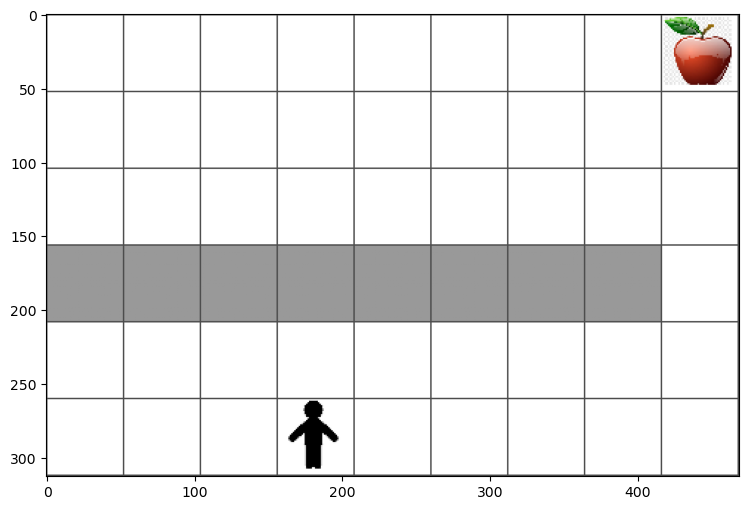

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from rlboard1 import *

width, height = 9,6
m = Board(width,height)
m.human = 3,5  
for i in range(0,width-1):
    m.matrix[i,3] = Board.Cell.grey

m.matrix[8,0] = Board.Cell.apple
m.plot()

In [68]:
actions = { "U" : (0,-1), "D" : (0,1), "L" : (-1,0), "R" : (1,0) }
action_idx = { a : i for i,a in enumerate(actions.keys()) }

In [69]:
def print_statistics(policy):
    s,w,n = 0,0,0
    for _ in range(100):
        z = walk(m,policy)
        if z<0:
            w+=1
        else:
            s += z
            n += 1
    print(f"Average path length = {s/n}, eaten by wolf: {w} times")

print_statistics(random_policy)

Average path length = 314.12, eaten by wolf: 0 times


In [70]:
#code block 5
move_reward = -0.5
goal_reward = 100
end_reward = -10

def reward(m,pos=None):
    pos = pos or m.human
    if not m.is_valid(pos):
        return end_reward
    x = m.at(pos)
    if x==Board.Cell.water or x == Board.Cell.wolf:
        return end_reward
    if x==Board.Cell.apple:
        return goal_reward
    return move_reward

In [71]:
# code block 6
Q = np.ones((width,height,len(actions)),dtype=float)*1.0/len(actions)

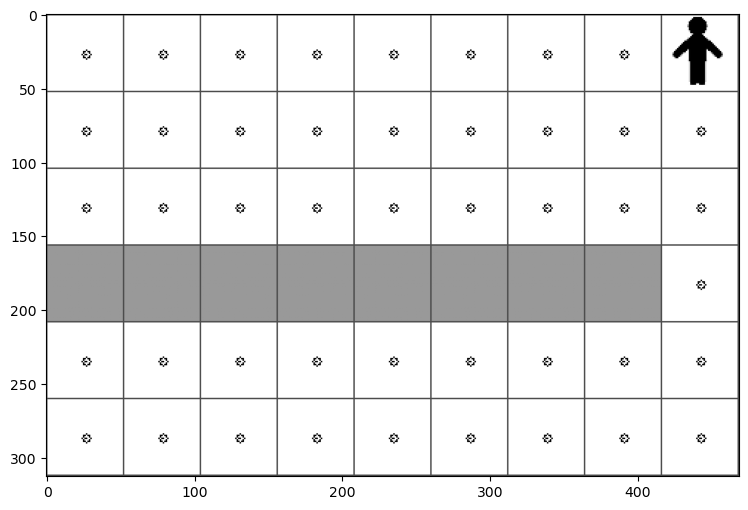

In [72]:
m.plot(Q)

In [73]:
# code block 7
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

In [77]:
from IPython.display import clear_output

lpath = []


for i in range(0,width-1):
    m.matrix[i,3] = Board.Cell.grey


for epoch in range(10000):

    # Pick initial point
    m.human = 3,5  

    if epoch == 5000:
        for i in range(0,width-1):
            m.matrix[i,3] = Board.Cell.empty
        for i in range(1,width):
            m.matrix[i,3] = Board.Cell.grey
    
    # Start travelling
    n=0
    cum_reward = 0
    while True:
        x,y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions),weights=v)[0]
        dpos = actions[a]
        m.move(dpos,check_correctness=True) # we allow player to move outside the board, which terminates episode
        r = reward(m)
        cum_reward += r
        if r==end_reward or cum_reward < -1000:
            lpath.append(n)
            break
        alpha = np.exp(-n / 10e5)
        gamma = 0.5
        ai = action_idx[a]
        Q[x,y,ai] = (1 - alpha) * Q[x,y,ai] + alpha * (r + gamma * Q[x+dpos[0], y+dpos[1]].max())
        n+=1
# code block 8

IndexError: index 6 is out of bounds for axis 1 with size 6

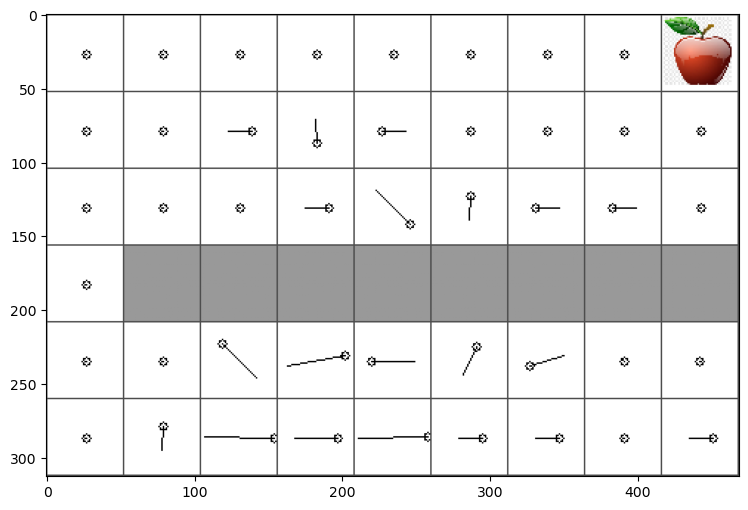

In [75]:
m.plot(Q)

In [76]:
# code block 9
def qpolicy_strict(m):
        x,y = m.human
        v = probs(Q[x,y])
        a = list(actions)[np.argmax(v)]
        return a

walk(m,qpolicy_strict)

KeyboardInterrupt: 